In [1]:
#Importing libraries needed for cleaning and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Reding in testing data
df = pd.read_csv('testing_dataset.csv')
df.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0,0


In [3]:
X = df.drop('y', 1)
y = df['y']

In [4]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0


In [5]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: y, dtype: int64

In [8]:
#Selecting 20 best featuresto began testing models
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [9]:
print(colnames_selected)

['alter-egos', 'relatives', 'intelligence', 'durability', 'strength', 'overall', 'durability.1', 'intelligence.1', 'strength.1', 'combat_durability', 'combat_strength', 'durability_intelligence', 'durability_power', 'durability_speed', 'durability_strength', 'intelligence_power', 'intelligence_strength', 'power_strength', 'speed_strength', 'publisher_2']


## Logistic Regression

In [31]:
 calculate accuracy
from sklearn import metrics
y_pred_class = log.predict(X_test_selected)
log_auc = metrics.accuracy_score(y_test, y_pred_class)

In [270]:
print('Accuracy:', log_auc)

Accuracy: 0.7051282051282052


In [219]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    56
0    22
Name: y, dtype: int64

In [220]:
# calculate the percentage of 'good'
y_test.mean()

0.717948717948718

In [221]:
# calculate the percentage of 'evil
1 - y_test.mean()

0.28205128205128205

In [228]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1]
Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0]


## Naives Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train)
y_predNB = gnb.predict(X_test_selected)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.5897435897435898


## Stochastic Gradient Descent

In [13]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter= 10000)
sgd.fit(X_train_selected, y_train)
y_predsgd = sgd.predict(X_test_selected)

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_predsgd))

Accuracy: 0.6666666666666666


## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_selected, y_train)
y_preddt = dt.predict(X_test_selected)

In [16]:
print("Accuracy:", metrics.accuracy_score(y_test, y_preddt))

Accuracy: 0.7051282051282052


## Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_selected, y_train)
y_predrf = rf.predict(X_test_selected)

In [18]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predrf))

Accuracy: 0.7051282051282052


## SVM

In [19]:
from sklearn.svm import SVC
svm = SVC(gamma = 'auto')
svm.fit(X_train_selected, y_train)
y_predsvm = svm.predict(X_test_selected)

In [20]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsvm))

Accuracy: 0.6666666666666666


## K Nearest Neigbhors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_selected, y_train)
y_predsneigh = neigh.predict(X_test_selected)

In [22]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsneigh))

Accuracy: 0.6282051282051282


## AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.3)
ada.fit(X_train_selected, y_train)
y_predsada = ada.predict(X_test_selected)

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsada))

Accuracy: 0.6153846153846154


## Gradient Boost

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.8)
gb.fit(X_train_selected, y_train)
y_predsg_b = gb.predict(X_test_selected)

In [26]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predsg_b))

Accuracy: 0.6410256410256411


In [32]:
scores_dict = { 
               'Logistic Regression': log_auc,
               'Naives Bayes': metrics.accuracy_score(y_test, y_predNB),
               'KNN': metrics.accuracy_score(y_test, y_predsneigh),
               'Decision Trees': metrics.accuracy_score(y_test, y_preddt),
               'Random Forest': metrics.accuracy_score(y_test, y_predrf),
               'SVM': metrics.accuracy_score(y_test, y_predsvm),
               'AdaBoost': metrics.accuracy_score(y_test, y_predsada),
               'Stochastic Gradient Descent': metrics.accuracy_score(y_test, y_predsgd),
               'Gradient Boost': metrics.accuracy_score(y_test, y_predsg_b),
               'Average' :scores_df['Accuracy'].mean()

}

In [720]:
scores_dict

{'Logistic Regression': 0.7051282051282052,
 'Naives Bayes': 0.6025641025641025,
 'KNN': 0.7051282051282052,
 'Decision Trees': 0.48717948717948717,
 'Random Forest': 0.6538461538461539,
 'SVM': 0.6923076923076923,
 'AdaBoost': 0.7307692307692307,
 'Stochastic Gradient Descent': 0.717948717948718,
 'Gradient Boost': 0.717948717948718,
 'Average': 0.6680911680911681}

In [721]:
scores_df = pd.DataFrame(scores_dict, index = ['Accuracy']).T
scores_df

,Accuracy
Logistic Regression,0.705128
Naives Bayes,0.602564
KNN,0.705128
Decision Trees,0.487179
Random Forest,0.653846
SVM,0.692308
AdaBoost,0.730769
Stochastic Gradient Descent,0.717949
Gradient Boost,0.717949
Average,0.668091


In [722]:
scores_dict = {'scores_mean':scores_df['Accuracy'].mean()}
scores_dict

{'scores_mean': 0.6680911680911681}

## Confusion Matrices 

In [704]:
log_con_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print('Logistic Regression Confusion Matrix' '\n', metrics.confusion_matrix(y_test, y_pred_class))

Logistic Regression Confusion Matrix
 [[ 0 22]
 [ 0 56]]


In [421]:
print('Naives Bayes Confusion Matrix' '\n',metrics.confusion_matrix((y_test, y_predNB))

Naives Bayes Confusion Matrix
 [[ 5 17]
 [14 42]]


In [422]:
print('KNN Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsneigh))

KNN Confusion Matrix
 [[ 4 18]
 [ 5 51]]


In [423]:
print('Decision Trees Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_preddt))

Decision Trees Confusion Matrix
 [[ 8 14]
 [26 30]]


In [424]:
print('Random Forest Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predrf))

Random Forest Confusion Matrix
 [[ 4 18]
 [ 9 47]]


In [425]:
print('SVM Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsvm))

SVM Confusion Matrix
 [[ 1 21]
 [ 3 53]]


In [426]:
print('AdaBoost Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsada))

AdaBoost Confusion Matrix
 [[ 2 20]
 [ 1 55]]


In [713]:
sgd_con_matrix = metrics.confusion_matrix(y_test, y_predsgb)
print('Stochastic Gradient Descent Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsgb))

Stochastic Gradient Descent Confusion Matrix
 [[ 1 21]
 [ 1 55]]


In [705]:
gr_con_matrix = metrics.confusion_matrix(y_test, y_predsg_b)
print('Gradient Boost Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsg_b))

Gradient Boost Confusion Matrix
 [[ 7 15]
 [ 7 49]]


### Exploring Adaboost

In [442]:
print('AdaBoost Confusion Matrix' '\n',metrics.confusion_matrix(y_test, y_predsada))

AdaBoost Confusion Matrix
 [[ 2 20]
 [ 1 55]]


In [456]:
# ada_confusion = metrics.confusion_matrix(y_test, y_predsada)
TP = ada_confusion[1, 1]
TN = ada_confusion[0, 0]
FP = ada_confusion[0, 1]
FN = ada_confusion[1, 0]

In [457]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predsada)
classes = ['Villain', 'Hero']

In [458]:
#Function to plot confusion matrices
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 0 22]
 [ 0 56]]


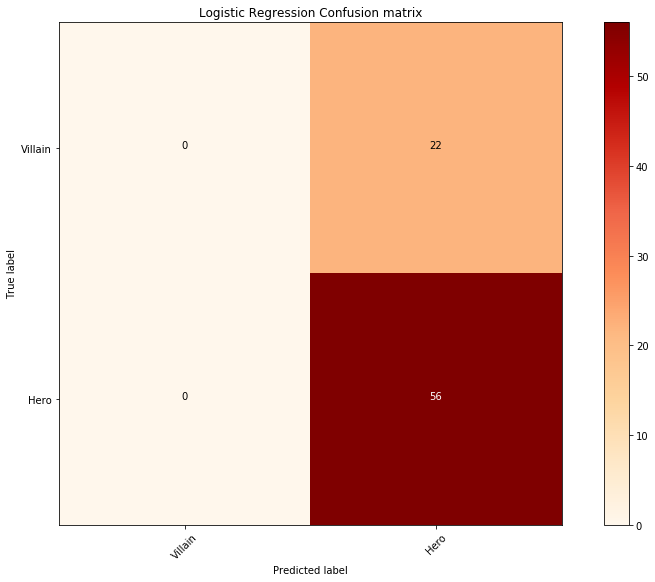

In [798]:
import itertools
plt.subplots(figsize = (12,8))
plot_confusion_matrix(log_con_matrix, classes,
                          normalize=False,
                          title='Logistic Regression Confusion matrix',
                          cmap= 'OrRd')

Confusion Matrix, without normalization
[[ 0 22]
 [ 0 56]]


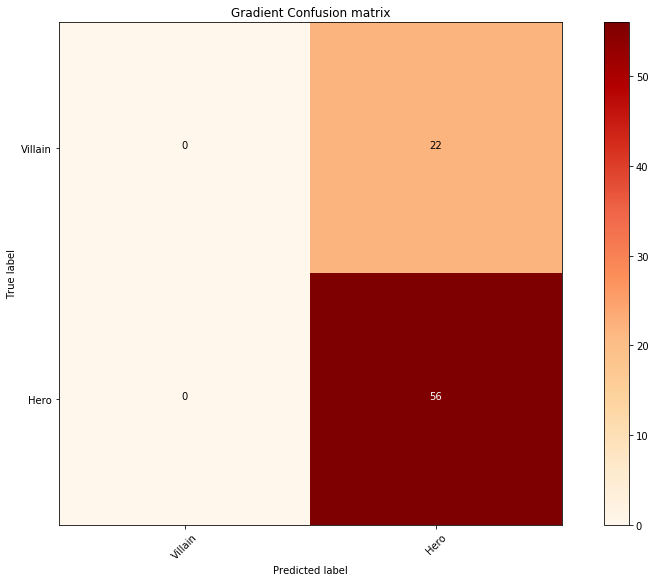

In [797]:
plt.subplots(figsize = (12,8))
plot_confusion_matrix(gr_con_matrix, classes,
                          normalize=False,
                          title='Gradient Confusion matrix',
                          cmap= 'OrRd')

Confusion Matrix, without normalization
[[ 1 21]
 [ 1 55]]


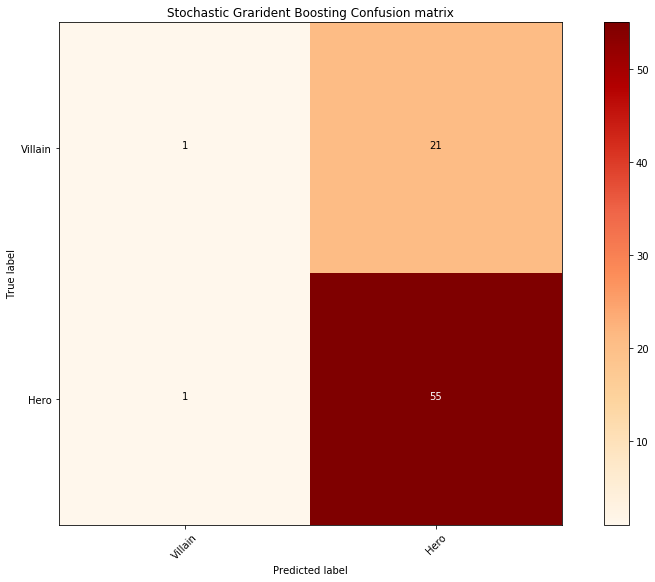

In [715]:
plt.subplots(figsize = (12,8))
plot_confusion_matrix(sgd_con_matrix, classes,
                          normalize=False,
                          title='Stochastic Grarident Boosting Confusion matrix',
                          cmap= 'OrRd')

Confusion Matrix, without normalization
[[ 2 20]
 [ 1 55]]


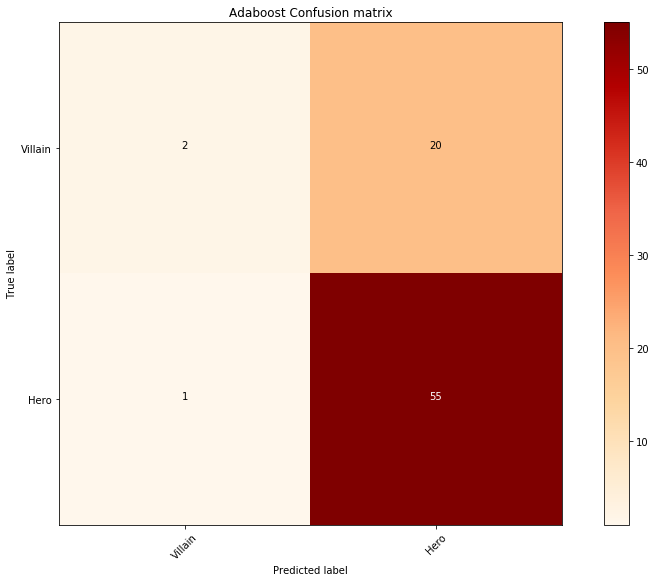

In [800]:
plt.subplots(figsize = (12,8))
plot_confusion_matrix(ada_confusion, classes,
                          normalize=False,
                          title='Adaboost Confusion matrix',
                          cmap= 'OrRd')

In [725]:
x = { 'Logistic Regression Calculation Accuarcy': metrics.accuracy_score(y_test, y_predsada) }
o = { 'Gradient Boost Calculation Accuracy': metrics.accuracy_score(y_test, y_predsgb) }
b = { 'Stochastic Gradient Descent Calculation Accuarcy':metrics.accuracy_score(y_test, y_predsgd) }


({'Logistic Regression Calculation Accuarcy': 0.7307692307692307},
 {'Gradient Boost Calculation Accuracy': 0.717948717948718},
 {'Stochastic Gradient Descent Calculation Accuarcy': 0.717948717948718})

In [460]:
print('Classication Accuracy')
print(metrics.accuracy_score(y_test, y_predsada))

Classication Accuracy
0.7307692307692307


In [461]:
print('Classication Error')
print(1 - metrics.accuracy_score(y_test, y_predsada))

Classication Error
0.2692307692307693


In [462]:
print('Recall')
print(metrics.recall_score(y_test, y_predsada))

Recall
0.9821428571428571


In [463]:
print('Specificity')
print(TN / float(TN + FP))

Specificity
0.09090909090909091


In [464]:
print('False Positive')
print(FP / float(TN + FP))

False Positive
0.9090909090909091


In [465]:
print('Precision')
print(metrics.precision_score(y_test, y_predsada))

Precision
0.7333333333333333


In [466]:
print('F1 Score')
print(2*(metrics.precision_score(y_test, y_predsada)*metrics.recall_score(y_test, y_predsada))/(metrics.precision_score(y_test, y_predsada)+metrics.recall_score(y_test, y_predsada)))

F1 Score
0.8396946564885496


In [820]:
class_metrics_dict  =  { 
               'Classification Accuracy': metrics.accuracy_score(y_test, y_predsg_b),
               'Classification Error': (1 - metrics.accuracy_score(y_test, y_predsg_b)),
               'Recall': (metrics.recall_score(y_test, y_predsg_b)),
               'Specificity': (TN / float(TN + FP)),
               'False Positive': (FP / float(TN + FP)),
               'Precision': (metrics.precision_score(y_test, y_predsg_b)),
               'F1 Score': (2*(metrics.precision_score(y_test, y_predsg_b)
                             *metrics.recall_score(y_test, y_predsg_b))
                             /(metrics.precision_score(y_test, y_predsg_b)
                             +metrics.recall_score(y_test, y_predsg_b))), 
               }    
class_metrics_dict

{'Classification Accuracy': 0.6153846153846154,
 'Classification Error': 0.3846153846153846,
 'Recall': 0.8148148148148148,
 'Specificity': 0.09090909090909091,
 'False Positive': 0.9090909090909091,
 'Precision': 0.6875,
 'F1 Score': 0.7457627118644067}

In [812]:
t = pd.read_csv('testing_dataset.csv')
t.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0,0


In [814]:
X = t.drop('y', axis = 1)

In [813]:
y = t['y']

In [807]:
X['y'] = t['y']
y = t['y']

In [808]:
X = X.drop('y', axis = 1)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0


In [821]:
class_metrics_df = pd.DataFrame(class_metrics_dict, index = ['Gradient Boost Metrics']).T
class_metrics_df

,Gradient Boost Metrics
Classification Accuracy,0.615385
Classification Error,0.384615
Recall,0.814815
Specificity,0.090909
False Positive,0.909091
Precision,0.687500
F1 Score,0.745763


## Adjusting the Classification Threshold

In [473]:
ada.predict(X_test_selected)[0:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [474]:
# print the first 10 predicted probabilities of class membership
ada.predict_proba(X_test_selected)[0:10, :]

array([[0.48130523, 0.51869477],
       [0.49083849, 0.50916151],
       [0.48871844, 0.51128156],
       [0.4051982 , 0.5948018 ],
       [0.48863344, 0.51136656],
       [0.48639527, 0.51360473],
       [0.48501977, 0.51498023],
       [0.48870916, 0.51129084],
       [0.49596012, 0.50403988],
       [0.48864138, 0.51135862]])

In [475]:
ada.predict_proba(X_test_selected)[0:10, 1]

array([0.51869477, 0.50916151, 0.51128156, 0.5948018 , 0.51136656,
       0.51360473, 0.51498023, 0.51129084, 0.50403988, 0.51135862])

In [476]:
# store the predicted probabilities for class 1
y_pred_prob = ada.predict_proba(X_test_selected)[:, 1]

Text(0, 0.5, 'Frequency')

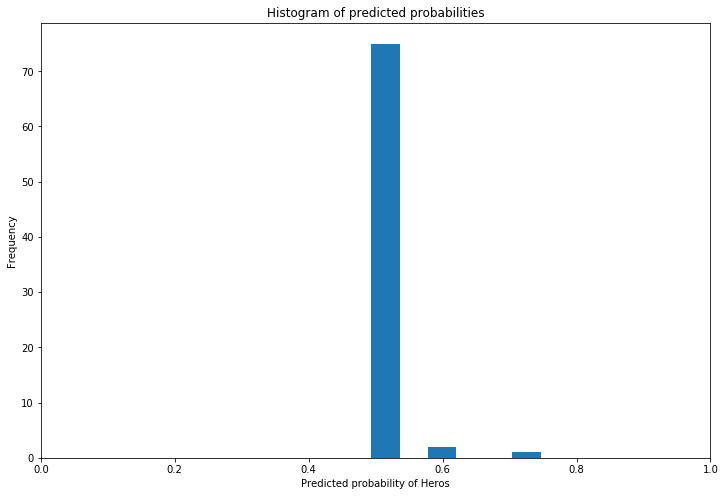

In [484]:
# histogram of predicted probabilities
plt.subplots(figsize = (12,8))
plt.hist(y_pred_prob, bins=6)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Heros')
plt.ylabel('Frequency')

In [605]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.4)[0]

In [606]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.51869477, 0.50916151, 0.51128156, 0.5948018 , 0.51136656,
       0.51360473, 0.51498023, 0.51129084, 0.50403988, 0.51135862])

In [607]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:80]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [608]:
# previous confusion matrix (default threshold of 0.5)
print(ada_confusion)

[[ 2 20]
 [ 1 55]]


In [609]:
# new confusion matrix (threshold of 0.5)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 0 22]
 [ 0 56]]


In [610]:
# sensitivity has increased (used to be 0.98)
print(56 / float(56))

1.0


In [611]:
# specificity has decreased (used to be 0.09)
print(0 / float(0 + 22))

0.0


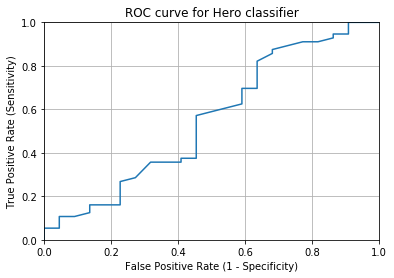

In [612]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Hero classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [734]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [736]:
## Get the Hero and the Villain
hero = Z[Z['y']==1]

villain = Z[Z['y']==0]

In [739]:
hero.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0,1
6,0.0,0.0,1.0,1.0,64.0,12.0,63.0,100.0,100.0,10.0,...,6300.0,756.0,630.0,1200.0,1000.0,120.0,0,0,1,1
7,0.0,1.0,1.0,1.0,50.0,33.0,69.0,37.0,40.0,10.0,...,2553.0,2277.0,690.0,1221.0,370.0,330.0,0,1,0,1


In [740]:
hero.shape,villain.shape

((534, 36), (240, 36))